Here i am very interested to finding Rainfall Prediction using neural networks, in below i mentioned details about dataset and
i am taken that dataset from "data.gov.in"website

Reference link:https://data.gov.in/catalog/rainfall-india?filters%5Bfield_catalog_reference%5D=1090541&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc

Time Period: 1901 - 2017

Granularity: Monthly

Location: 36 meteorological sub-divisions in India

Rainfall unit: mm

In [2]:
# import the required libraries
from pandas import read_csv 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [3]:
Rainfall_data = read_csv('Sub_Division_IMD_2017.csv')
Rainfall_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
Rainfall_data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

Here i observe some null values are presented in the dataset, so we have to fill them with mean values because all data points are be in the form of numeric. 

In [7]:
Rainfall_data['JAN'].fillna((Rainfall_data['JAN'].mean()), inplace=True)
Rainfall_data['FEB'].fillna((Rainfall_data['FEB'].mean()), inplace=True)
Rainfall_data['MAR'].fillna((Rainfall_data['MAR'].mean()), inplace=True)
Rainfall_data['APR'].fillna((Rainfall_data['APR'].mean()), inplace=True)
Rainfall_data['MAY'].fillna((Rainfall_data['MAY'].mean()), inplace=True)
Rainfall_data['JUN'].fillna((Rainfall_data['JUN'].mean()), inplace=True)
Rainfall_data['JUL'].fillna((Rainfall_data['JUL'].mean()), inplace=True)
Rainfall_data['AUG'].fillna((Rainfall_data['AUG'].mean()), inplace=True)
Rainfall_data['SEP'].fillna((Rainfall_data['SEP'].mean()), inplace=True)
Rainfall_data['OCT'].fillna((Rainfall_data['OCT'].mean()), inplace=True)
Rainfall_data['NOV'].fillna((Rainfall_data['NOV'].mean()), inplace=True)
Rainfall_data['DEC'].fillna((Rainfall_data['DEC'].mean()), inplace=True)

In [8]:
Counter(Rainfall_data['SUBDIVISION'])

Counter({'Andaman & Nicobar Islands': 112,
         'Arunachal Pradesh': 99,
         'Assam & Meghalaya': 117,
         'Naga Mani Mizo Tripura': 117,
         'Sub Himalayan West Bengal & Sikkim': 117,
         'Gangetic West Bengal': 117,
         'Orissa': 117,
         'Jharkhand': 117,
         'Bihar': 117,
         'East Uttar Pradesh': 117,
         'West Uttar Pradesh': 117,
         'Uttarakhand': 117,
         'Haryana Delhi & Chandigarh': 117,
         'Punjab': 117,
         'Himachal Pradesh': 117,
         'Jammu & Kashmir': 117,
         'West Rajasthan': 117,
         'East Rajasthan': 117,
         'West Madhya Pradesh': 117,
         'East Madhya Pradesh': 117,
         'Gujarat Region': 117,
         'Saurashtra & Kutch': 117,
         'Konkan & Goa': 117,
         'Madhya Maharashtra': 117,
         'Matathwada': 117,
         'Vidarbha': 117,
         'Chhattisgarh': 117,
         'Coastal Andhra Pradesh': 117,
         'Telangana': 117,
         'Rayalseema': 11

In [ ]:
Here I choosen "Telangana" state and converted all data points into list

In [9]:
T_list=[]
k=-1
for i in Rainfall_data['SUBDIVISION']:
    k=k+1
    if i=='Telangana':
       T_list.append(k)

In [10]:
print(T_list)

[3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369]


In [11]:
len(T_list)

117

In [12]:
Rainfall_data['SUBDIVISION'][3253]

'Telangana'

In [14]:
# List is converted to Dataframe
Rainfall_data1=Rainfall_data.iloc[3253:3369:,:]

In [15]:
Rainfall_data1.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
3253,Telangana,1901,6.9,41.8,7.8,45.2,22.0,123.6,237.8,177.2,77.7,75.5,12.2,0.0,827.7,48.7,75.0,616.4,87.7
3254,Telangana,1902,0.0,0.0,0.2,10.7,7.3,52.4,146.3,142.8,190.5,41.7,31.2,7.3,630.4,0.0,18.2,532.0,80.2
3255,Telangana,1903,12.9,4.6,0.0,9.9,40.7,99.2,505.2,246.7,191.9,155.8,15.5,1.1,1283.4,17.5,50.5,1042.9,172.4
3256,Telangana,1904,0.0,0.0,10.8,0.8,14.7,104.2,139.5,50.0,162.3,44.4,0.0,0.0,526.7,0.0,26.3,456.0,44.4
3257,Telangana,1905,0.0,4.3,12.8,27.6,32.2,129.5,82.4,237.3,179.1,19.6,0.0,0.0,724.9,4.3,72.6,628.4,19.6


Max: 1544.9 ocurred in [1988]
Max: 437.0 ocurred in [1920]
Mean: 954.1543103448278


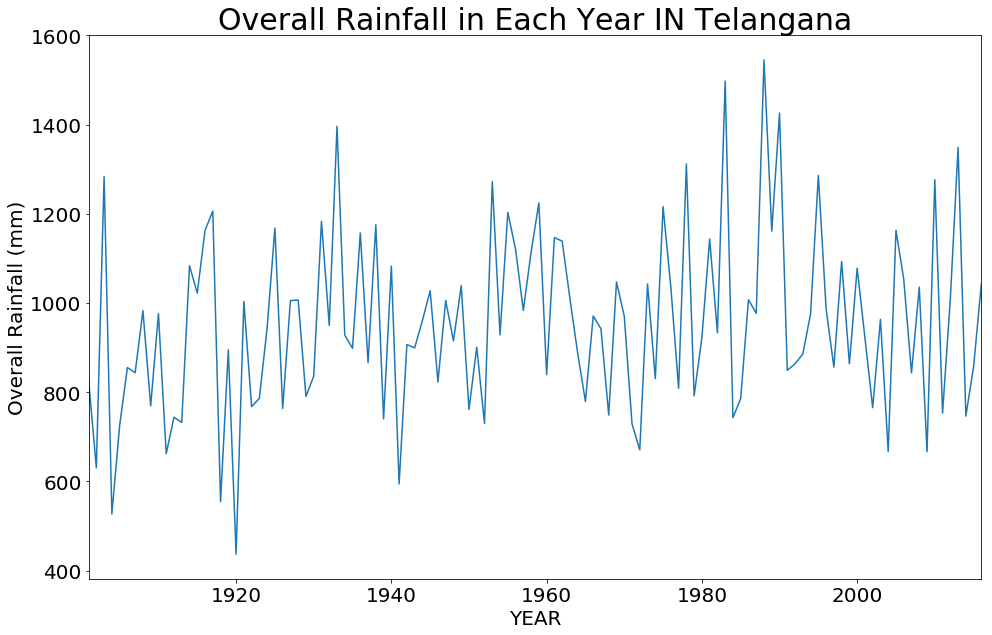

In [16]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = Rainfall_data1.groupby('YEAR').sum()['ANNUAL']
dfg.plot('line', title='Overall Rainfall in Each Year IN Telangana', fontsize=20)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean())) 

In [17]:
Rainfall_data1=Rainfall_data1.drop(['SUBDIVISION','YEAR','ANNUAL','JF','MAM','JJAS','OND'],axis=1)

In [18]:
Rainfall_data1=Rainfall_data1.T

In [19]:
Rainfall_data1.head(12)

,3253,3254,3255,3256,3257,3258,3259,3260,3261,3262,...,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368
JAN,6.9,0.0,12.9,0.0,0.0,22.5,1.0,35.6,0.5,0.0,...,0.0,0.2,0.0,10.3,0.0,6.7,2.4,0.2,17.5,1.2
FEB,41.8,0.0,4.6,0.0,4.3,1.2,3.3,2.6,5.9,0.0,...,0.0,18.6,0.0,5.3,11.9,0.0,29.0,2.9,0.0,0.2
MAR,7.8,0.2,0.0,10.8,12.8,13.4,10.2,5.2,0.5,0.0,...,0.1,108.6,2.1,1.5,2.6,0.2,0.2,58.3,43.0,11.5
APR,45.2,10.7,9.9,0.8,27.6,2.4,61.9,0.3,26.4,4.2,...,0.1,15.7,4.5,5.6,25.6,14.0,24.4,10.3,65.7,4.3
MAY,22.0,7.3,40.7,14.7,32.2,0.7,0.2,6.5,2.2,25.0,...,9.2,4.9,13.1,24.9,9.3,8.4,8.5,73.3,23.3,55.1
JUN,123.6,52.4,99.2,104.2,129.5,211.1,217.5,107.4,133.8,220.9,...,176.6,132.9,85.8,127.0,83.9,124.4,213.4,62.3,266.9,194.0
JUL,237.8,146.3,505.2,139.5,82.4,210.8,160.5,254.9,288.3,198.2,...,134.6,183.4,118.4,395.5,268.2,300.3,453.8,146.0,104.4,235.8
AUG,177.2,142.8,246.7,50.0,237.3,226.7,263.3,168.3,168.6,150.3,...,206.6,391.8,192.3,308.1,225.9,229.9,230.6,205.2,160.5,133.7
SEP,77.7,190.5,191.9,162.3,179.1,96.3,116.8,401.2,138.5,230.5,...,262.3,146.7,149.7,249.8,107.6,202.4,161.4,146.8,158.3,336.3
OCT,75.5,41.7,155.8,44.4,19.6,20.5,0.3,0.1,4.6,101.4,...,40.8,24.2,69.5,98.7,13.9,83.6,205.9,29.6,15.6,70.4


In [41]:
l=[]
for i in range(3253,3369):
    for j in range(0,12):
         l.append(Rainfall_data1[i][j])

In [42]:
len(l)

1392

In [43]:
type(l)

list

In [44]:
Rainfall_data2 = pd.DataFrame(l)

In [45]:
values = Rainfall_data2.values.astype('float32')
values

array([[ 6.9],
       [41.8],
       [ 7.8],
       ...,
       [70.4],
       [ 0.5],
       [ 0.4]], dtype=float32)

split and scale the data

In [46]:
train_size = int((values.shape[0] * 0.70))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [48]:
train

array([[1.36579573e-02],
       [8.27395096e-02],
       [1.54394303e-02],
       [8.94695222e-02],
       [4.35471125e-02],
       [2.44655579e-01],
       [4.70704675e-01],
       [3.50752175e-01],
       [1.53800473e-01],
       [1.49445772e-01],
       [2.41488516e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.95882846e-04],
       [2.11797301e-02],
       [1.44497240e-02],
       [1.03721306e-01],
       [2.89588302e-01],
       [2.82660335e-01],
       [3.77078384e-01],
       [8.25415701e-02],
       [6.17577210e-02],
       [1.44497240e-02],
       [2.55344417e-02],
       [9.10530519e-03],
       [0.00000000e+00],
       [1.95961986e-02],
       [8.05621594e-02],
       [1.96357876e-01],
       [1.00000000e+00],
       [4.88321453e-01],
       [3.79849553e-01],
       [3.08392733e-01],
       [3.06809191e-02],
       [2.17735558e-03],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.13776734e-02],
       [1.58353138e-03],


In [49]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [50]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [51]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(971, 3, 1)

In [52]:
from keras.layers import Dense, SimpleRNN, Dropout,LSTM
from keras.metrics import mean_squared_error
from keras.models import Sequential

In [53]:
model = Sequential()
model.add(SimpleRNN(80, input_shape=(look_back, 1)))
model.add(Dropout(0.25))
model.add(Dense(40))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50,batch_size = 1)


Epoch 1/50
971/971 [==============================] - 6s 6ms/step - loss: 0.0296
Epoch 2/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0254
Epoch 3/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0257
Epoch 4/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0248
Epoch 5/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0243
Epoch 6/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0247
Epoch 7/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0246
Epoch 8/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0247
Epoch 9/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0242
Epoch 10/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0242
Epoch 11/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0243
Epoch 12/50
971/971 [==============================] - 4s 4ms/step - loss: 0.0238
Epoch 13/50
971/971 [====

In [54]:
# make a predections on testdata
testPredict = model.predict(testX)

In [55]:
testPredict

array([[ 1.77541360e-01],
       [ 2.74702519e-01],
       [ 4.40948069e-01],
       [ 2.90430307e-01],
       [ 1.95657194e-01],
       [ 1.50806457e-01],
       [ 5.01366258e-02],
       [ 7.40583688e-02],
       [ 1.24622330e-01],
       [ 1.38950765e-01],
       [ 1.35870785e-01],
       [ 1.36091113e-01],
       [ 1.80518597e-01],
       [ 3.28904092e-01],
       [ 4.83822882e-01],
       [ 5.53224027e-01],
       [ 4.27794158e-01],
       [ 1.29496127e-01],
       [-7.60173351e-02],
       [ 3.56274545e-02],
       [ 1.42264962e-01],
       [ 1.39390379e-01],
       [ 1.35285676e-01],
       [ 1.43120378e-01],
       [ 1.35363609e-01],
       [ 2.57424057e-01],
       [ 4.75194335e-01],
       [ 2.21914783e-01],
       [ 1.12318635e-01],
       [ 1.76316798e-01],
       [ 7.04506412e-02],
       [ 7.97548592e-02],
       [ 1.39508054e-01],
       [ 1.33766890e-01],
       [ 1.36181802e-01],
       [ 1.53041631e-01],
       [ 1.47956416e-01],
       [ 3.49740952e-01],
       [ 4.0

In [56]:
testPredict = scaler.inverse_transform(testPredict).ravel()

In [57]:
testTrue = scaler.inverse_transform([testY]).ravel()

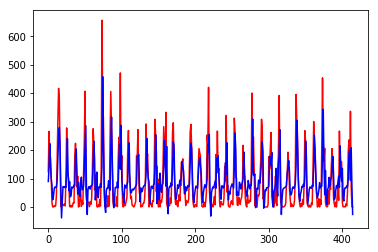

In [58]:
# lastly i plotted lineplot for test and train data
plt.plot(testTrue, c = 'r')
plt.plot(testPredict, c = 'b')

In [ ]:
Thanking you !